# Machine Learning

In [1]:
# Phase3_ML.ipynb

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries (will add more later)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix


# Load Data (the features from Phase 2)
features = np.load("engineered_features.npz")

# Check available keys (just to inspect)
print(features.files)

deltaR_quark_all = features["deltaR_quark_all"]
deltaR_gluon_all = features["deltaR_gluon_all"]

deltaR_quark_mean = features["deltaR_quark_mean"]
deltaR_gluon_mean = features["deltaR_gluon_mean"]

deltaR_quark_max = features["deltaR_quark_max"]
deltaR_gluon_max = features["deltaR_gluon_max"]

eta_width_quark = features["eta_width_quark"]
eta_width_gluon = features["eta_width_gluon"]

phi_width_quark = features["phi_width_quark"]
phi_width_gluon = features["phi_width_gluon"]

pt_quark = features["pt_quark"]
pt_gluon = features["pt_gluon"]


print(type(deltaR_quark_mean), deltaR_quark_mean.shape)
print(type(deltaR_quark_mean), deltaR_gluon_mean.shape)
print(type(deltaR_quark_max), deltaR_quark_max.shape)
print(type(deltaR_quark_max), deltaR_gluon_max.shape)
print(type(eta_width_quark), eta_width_quark.shape)
print(type(eta_width_gluon), eta_width_gluon.shape)
print(type(phi_width_quark), phi_width_quark.shape)
print(type(phi_width_gluon), phi_width_gluon.shape)
print(type(pt_quark), pt_quark.shape)
print(type(pt_gluon), pt_gluon.shape)


['deltaR_quark_all', 'deltaR_gluon_all', 'deltaR_quark_mean', 'deltaR_gluon_mean', 'deltaR_quark_max', 'deltaR_gluon_max', 'eta_width_quark', 'eta_width_gluon', 'phi_width_quark', 'phi_width_gluon', 'pt_quark', 'pt_gluon']
<class 'numpy.ndarray'> (50000,)
<class 'numpy.ndarray'> (50000,)
<class 'numpy.ndarray'> (50000,)
<class 'numpy.ndarray'> (50000,)
<class 'numpy.ndarray'> (50000,)
<class 'numpy.ndarray'> (50000,)
<class 'numpy.ndarray'> (50000,)
<class 'numpy.ndarray'> (50000,)
<class 'numpy.ndarray'> (50000,)
<class 'numpy.ndarray'> (50000,)


In [2]:
# Defining the feature matrix, X
X_quark = np.column_stack((pt_quark, eta_width_quark, phi_width_quark, deltaR_quark_mean, deltaR_quark_max))
X_gluon = np.column_stack((pt_gluon, eta_width_gluon, phi_width_gluon, deltaR_gluon_mean, deltaR_gluon_max))
X = np.vstack((X_quark, X_gluon))
print(X.shape)

# Defining the label vector, y
y_quark = np.ones(50000)
y_gluon = np.zeros(50000)
y = np.concatenate((y_quark, y_gluon))
print(y.shape)

(100000, 5)
(100000,)


In [3]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, 
    random_state=42,
    shuffle=True
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape) 

(80000, 5) (80000,)
(20000, 5) (20000,)


In [4]:
from sklearn.preprocessing import RobustScaler


# Xa = np.array([[1], [2], [2], [3], [100]])  # clearly skewed with an outlier

# scaler = RobustScaler()
# X_scaled = scaler.fit_transform(Xa)

# print(X_scaled)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"X_train scaled: {X_train_scaled}")
print(f"X_test scaled: {X_test_scaled}")

X_train scaled: [[ 0.63096864  0.59301856  0.38911559  0.39729851  0.24945346]
 [ 1.00943502 -0.47924047 -0.50815328 -0.59874299  0.20434404]
 [ 0.66877442 -0.39741689 -0.63898537 -1.44938406 -2.5931082 ]
 ...
 [-0.0691514   0.25246853 -0.20069097  0.79267788  0.17483938]
 [ 0.79330721  0.04404102 -0.12907555  0.02789251 -2.34143073]
 [ 0.94710939  0.26006577  0.66608209  0.89140552  0.47286172]]
X_test scaled: [[-0.76494528  0.16928552 -0.05685186 -0.63032826 -1.47566371]
 [ 1.05812643 -0.29692376 -0.09061848 -0.3417722   0.37171095]
 [ 0.72700645 -0.79205105 -0.44257244 -0.52906326 -1.34001043]
 ...
 [ 0.63719198 -0.64267908 -0.64065604  0.14220533  0.52825918]
 [ 0.43814242 -0.24923592 -0.40420304 -0.05125935  0.35575979]
 [ 0.26281779 -0.16112647  0.3762629  -0.0699035  -0.08857599]]


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred_logistic = model.predict(X_test_scaled)

acc_logistic = accuracy_score(y_test, y_pred_logistic)
cm_logistic = confusion_matrix(y_test, y_pred_logistic)


print("Accuracy (Logistic regression):", acc_logistic)
print("Confusion Matrix (Logistic regression):\n", cm_logistic)


print(f"Logistic Regression report: \n {classification_report(y_test, y_pred_logistic)}")

# Random Forest  
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)
y_pred_randomf = model.predict(X_test_scaled)

acc_randomf = accuracy_score(y_test, y_pred_randomf)
cm_randomf = confusion_matrix(y_test, y_pred_randomf)

print("Accuracy (Random Forest):", acc_randomf)
print("Confusion Matrix (Random Forest):\n", cm_randomf)

print(f"Random Forest report: \n{classification_report(y_test, y_pred_randomf)}")

Accuracy (Logistic regression): 0.6858
Confusion Matrix (Logistic regression):
 [[6625 3340]
 [2944 7091]]
Logistic Regression report: 
               precision    recall  f1-score   support

         0.0       0.69      0.66      0.68      9965
         1.0       0.68      0.71      0.69     10035

    accuracy                           0.69     20000
   macro avg       0.69      0.69      0.69     20000
weighted avg       0.69      0.69      0.69     20000

Accuracy (Random Forest): 0.71765
Confusion Matrix (Random Forest):
 [[7888 2077]
 [3570 6465]]
Random Forest report: 
              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74      9965
         1.0       0.76      0.64      0.70     10035

    accuracy                           0.72     20000
   macro avg       0.72      0.72      0.72     20000
weighted avg       0.72      0.72      0.72     20000



### Model Comparison Summary (Initial Results)

| Metric       | Logistic Regression | Random Forest |
|--------------|---------------------|----------------|
| Accuracy     | 0.6858              | 0.71895        |
| Precision 0  | 0.69                | 0.69           |
| Recall 0     | 0.66                | 0.79           |
| F1-score 0   | 0.68                | 0.74           |
| Precision 1  | 0.68                | 0.76           |
| Recall 1     | 0.71                | 0.65           |
| F1-score 1   | 0.69                | 0.70           |

- Logistic Regression is better at **recalling quarks**.
- Random Forest performs better **overall**, especially at **recalling gluons**.
- Random Forest has higher **F1-scores** for both classes, suggesting better balance.

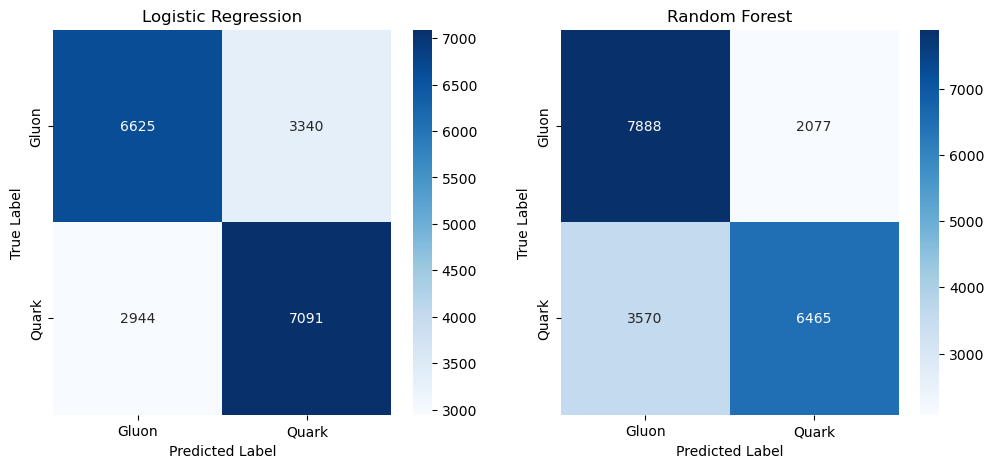

<Figure size 640x480 with 0 Axes>

In [6]:
import seaborn as sns


# Plot: heatmap
plt.figure(figsize=(12,5))

# Logistic regression
plt.subplot(1,2,1)
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', xticklabels=["Gluon", "Quark"], yticklabels=["Gluon", "Quark"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Logistic Regression")

# Random Forest
plt.subplot(1,2,2)
sns.heatmap(cm_randomf, annot=True, fmt='d', cmap='Blues', xticklabels=["Gluon", "Quark"], yticklabels=["Gluon", "Quark"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest")
plt.show()

plt.tight_layout()




In [7]:
# Fine tuning logistic regression model - C and solvers

solvers = ['liblinear', 'lbfgs', 'saga']
C_values = [0.01, 0.1, 1, 10, 100]

for solver in solvers:
    print(f"\nSolver: {solver}")
    for C in C_values:
        model = LogisticRegression(C=C, solver=solver, max_iter=1000)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        cr = classification_report(y_test, y_pred)
        # print(f"C={C:.2f} -> Accuracy: {acc:.4f}")
        # print(f"C={C:.2f} -> Confusion Matrix: \n{cm}\n")
        # print(f"C: {C:.2f} -> Class. Report: \n{cr}")
        


Solver: liblinear

Solver: lbfgs

Solver: saga


In [8]:
# Tuning Random forest classifier

n_estimators_list = [10, 20, 100, 200]
max_depth_list = [None, 5, 10, 20]

for n in n_estimators_list:
    for d in max_depth_list:
        model = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        cr = classification_report(y_test, y_pred)
        print(f"n_estimators={n}, max_depth={d} → Accuracy: {acc:.4f}")
        print(f"n_estimators={n}, max_depth={d} → Confusion Matrix: \n{cm}\n")
        print(f"n_estimators={n}, max_depth={d} → Class. Report: \n{cr}")

n_estimators=10, max_depth=None → Accuracy: 0.6986
n_estimators=10, max_depth=None → Confusion Matrix: 
[[7880 2085]
 [3944 6091]]

n_estimators=10, max_depth=None → Class. Report: 
              precision    recall  f1-score   support

         0.0       0.67      0.79      0.72      9965
         1.0       0.74      0.61      0.67     10035

    accuracy                           0.70     20000
   macro avg       0.71      0.70      0.70     20000
weighted avg       0.71      0.70      0.70     20000

n_estimators=10, max_depth=5 → Accuracy: 0.7102
n_estimators=10, max_depth=5 → Confusion Matrix: 
[[8181 1784]
 [4012 6023]]

n_estimators=10, max_depth=5 → Class. Report: 
              precision    recall  f1-score   support

         0.0       0.67      0.82      0.74      9965
         1.0       0.77      0.60      0.68     10035

    accuracy                           0.71     20000
   macro avg       0.72      0.71      0.71     20000
weighted avg       0.72      0.71      0.71   

### Model Comparison Summary: Logistic Regression vs Random Forest

| Metric            | Logistic Regression (Best) | Random Forest (Best) |
|-------------------|-----------------------------|------------------------|
| Accuracy          | 68.58%                      | **72.65%**             |
| Precision (Gluon) | 0.69                        | **0.69**               |
| Recall (Gluon)    | 0.66                        | **0.83**               |
| F1-score (Gluon)  | 0.68                        | **0.75**               |
| Precision (Quark) | 0.68                        | **0.79**               |
| Recall (Quark)    | **0.71**                    | 0.63                   |
| F1-score (Quark)  | 0.69                        | **0.70**               |

#### Inference:
- **Random Forest outperforms Logistic Regression** in almost every metric, especially in recognizing **Gluon jets** (recall = 0.83).
- Logistic Regression recalls **Quark jets** slightly better than random forest classifier, but overall performance is lower.
- **Random Forest is clearly better suited for this nonlinear problem.**

# Deep Learning

In [9]:
# MLP - Multilayer Perceptron

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

torch.manual_seed(42)

# Converting NumPy data to torch Tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Define model
class MLP_1Hidden(nn.Module):
    def __init__(self):
        super(MLP_1Hidden, self).__init__()
        self.fc1 = nn.Linear(5, 16)
        self.dropout = nn.Dropout(p=0.3)
        self.fc2 = nn.Linear(16, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc2(x))
        return x

model = MLP_1Hidden()
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

epochs = 2000
train_losses = []

# Training loop
for epoch in range(epochs):
    model.train()
    y_pred = model(X_train_tensor).squeeze()
    loss = loss_fn(y_pred, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())  # Track loss for every epoch
    
    if (epoch+1) % 100 == 0:
        with torch.no_grad():  # Don't track gradients
            y_pred_train_class = (y_pred > 0.5).int()
            # y_pred_train_class = torch.round(y_pred).int()
            y_train_np = y_train_tensor.detach().numpy()
            y_pred_train_np = y_pred_train_class.detach().numpy()
            train_acc = accuracy_score(y_train_np, y_pred_train_np)
            # print(f"Epoch {epoch+1}/{epochs}, BCE Loss: {loss.item():.4f}")

print(y_pred[:5], y_test_tensor[:5])
print(model.fc1.weight, model.fc2.weight)

tensor([0.2955, 0.8574, 0.7931, 0.7462, 0.4808], grad_fn=<SliceBackward0>) tensor([0., 0., 1., 0., 0.])
Parameter containing:
tensor([[-0.0308,  0.1834, -1.4020,  0.1023,  0.0227],
        [-0.0234, -1.5338,  0.0464,  0.3266,  0.0054],
        [-0.0129,  0.2231,  0.2274, -0.3672,  0.1716],
        [-0.0059,  0.1688,  0.1502, -0.2658,  0.1560],
        [ 0.0147, -0.1463, -0.3665,  0.7289, -0.3342],
        [-0.0268, -0.6020, -1.2248,  0.1720,  0.0601],
        [-0.0228, -1.3104, -0.4439,  0.0752,  0.0659],
        [-0.0028,  0.2110,  0.1931, -0.3067,  0.1448],
        [-0.0047,  0.1716,  0.1457, -0.2520,  0.1424],
        [-0.0132,  0.2244,  0.1944, -0.2809,  0.0976],
        [ 0.0257, -0.2636, -0.3258,  0.9125,  0.0923],
        [ 0.0087, -0.3357, -0.3683,  1.0376, -0.2830],
        [-0.0209,  0.1437,  0.2337, -0.2890,  0.1271],
        [ 0.0071,  0.4137,  0.1200, -0.3371,  0.1270],
        [ 0.0803, -0.2412,  0.1503, -0.7186, -0.2522],
        [-0.0431, -1.1130, -0.7608,  0.2764,  0.0

Acuracy: 0.71795
Cinfusion Matrix:
 [[8250 1715]
 [3926 6109]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.68      0.83      0.75      9965
         1.0       0.78      0.61      0.68     10035

    accuracy                           0.72     20000
   macro avg       0.73      0.72      0.71     20000
weighted avg       0.73      0.72      0.71     20000



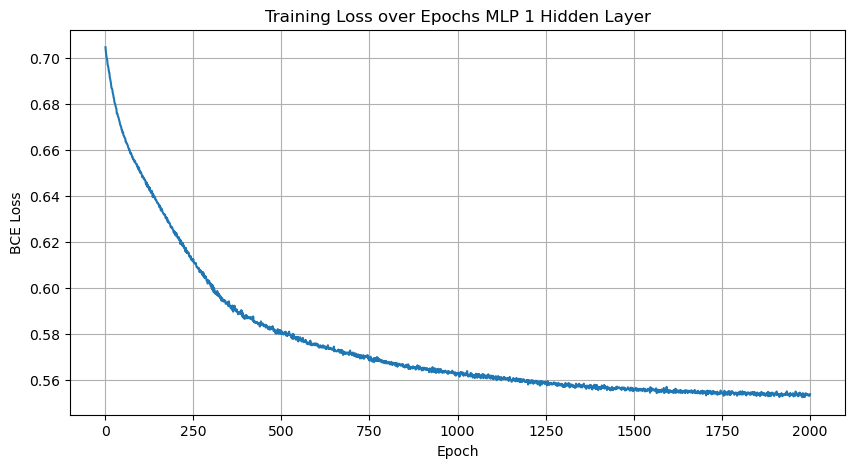

In [10]:
# Test set
y_pred = model(X_test_tensor).squeeze()

# Probabilities to class labels and threshold of 0.5 (> 0.5 = 1 (quark))
y_pred_class = (y_pred > 0.5).int() # .int() - converts True -> 1 and False -> 0 (1 and 0 (boolean output) from y_pred > 0.5)

# Convert to NumPy
y_pred_class = y_pred_class.detach().numpy()
y_test_numpy = y_test_tensor.detach().numpy()

# Statistics
print("Acuracy:", accuracy_score(y_test_numpy, y_pred_class))
print("Cinfusion Matrix:\n", confusion_matrix(y_test_numpy, y_pred_class))
print("Classification Report:\n", classification_report(y_test_numpy, y_pred_class))


plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses)+1), train_losses)
plt.xlabel("Epoch")
plt.ylabel("BCE Loss")
plt.title("Training Loss over Epochs MLP 1 Hidden Layer")
plt.grid(True)
plt.show()

        

In [11]:
# 2 layer

# MLP - Multilayer Perceptron

torch.manual_seed(42)

# Converting NumPy data to torch Tensors
# Train
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

# Test
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


class MLP_2Hidden(nn.Module):
    def __init__(self):
        super(MLP_2Hidden, self).__init__()

        # Fully connected Input layer -> Hidden layer 1
        self.fc1 = nn.Linear(5, 16)

        # Droupout
        self.dropout = nn.Dropout(p=0.3)

        # Fully connected Hidden layer 1 -> Hidden layer 2
        self.fc2 = nn.Linear(16, 8)

        # Fully connected Hidden layer -> Output layer
        self.fc3 = nn.Linear(8, 1)

    def forward(self, x):
        # First layer - ReLU activation
        x = F.relu(self.fc1(x))
        x = self.dropout(x)

        # Hidden layer 2 - ReLU activation
        x = F.relu(self.fc2(x))

        # Output layer - sigmoid activation
        x = torch.sigmoid(self.fc3(x))

        return x

model = MLP_2Hidden()

loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# Training loop
epochs = 2000 
train_losses = []

for epoch in range(epochs):
    model.train()

    # Forward pass
    y_pred = model(X_train_tensor).squeeze() # squeeze removes extra dimension of size 1 (say, 2D to 1D array: [N,1] -> [N]).

    # Loss
    loss = loss_fn(y_pred, y_train_tensor)

    # Backpropagation
    optimizer.zero_grad() # clear gradients
    loss.backward()       # calculating gradient
    optimizer.step()      # updating weights

    train_losses.append(loss.item())  # Tracking loss for every epoch

    
    if (epoch+1) % 100 == 0:
        with torch.no_grad():  # Don't track gradients
            y_pred_train_class = (y_pred > 0.5).int()
            # y_pred_train_class = torch.round(y_pred).int()
            y_train_np = y_train_tensor.detach().numpy()
            y_pred_train_np = y_pred_train_class.detach().numpy()
            train_acc = accuracy_score(y_train_np, y_pred_train_np)
            # print(f"Epoch {epoch+1}/{epochs}, BCE Loss: {loss.item():.4f}")

print(y_pred[:5], y_test_tensor[:5])
print(model.fc1.weight, model.fc2.weight)


tensor([0.2414, 0.8134, 0.7841, 0.3524, 0.5821], grad_fn=<SliceBackward0>) tensor([0., 0., 1., 0., 0.])
Parameter containing:
tensor([[ 1.1327e-02,  1.3292e-01, -8.8217e-01,  1.1279e-02,  3.1080e-06],
        [-7.4020e-03, -1.0277e+00, -9.7704e-04,  2.7951e-01, -1.1812e-02],
        [ 1.3232e-02,  1.8877e-02,  6.1484e-01, -1.3684e-01,  1.4935e-02],
        [-1.8427e-02,  1.2631e-01,  6.8936e-01, -3.1583e-01,  2.1204e-01],
        [-2.2516e-02, -2.3529e-01, -6.5074e-01,  3.5337e-01, -3.8087e-02],
        [-4.8048e-03, -6.6350e-01, -6.0418e-01,  6.4504e-02,  1.6960e-02],
        [ 3.9096e-02,  3.2143e-02,  8.0589e-01, -1.3617e-01, -7.4424e-03],
        [ 2.3874e-02,  7.4793e-02,  5.8880e-01, -1.3571e-01, -3.4319e-03],
        [ 6.2624e-03, -2.3695e-01, -2.2612e-01,  7.6976e-01, -2.8079e-01],
        [-3.1307e-02,  4.8033e-02,  5.8594e-01, -1.4435e-01,  4.6668e-02],
        [-9.1774e-03, -5.9407e-01, -6.6360e-01,  2.2709e-01, -1.4466e-02],
        [ 5.6496e-02, -2.7340e-01, -2.5833e-01,  

Acuracy: 0.72255
Cinfusion Matrix:
 [[8065 1900]
 [3649 6386]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.69      0.81      0.74      9965
         1.0       0.77      0.64      0.70     10035

    accuracy                           0.72     20000
   macro avg       0.73      0.72      0.72     20000
weighted avg       0.73      0.72      0.72     20000



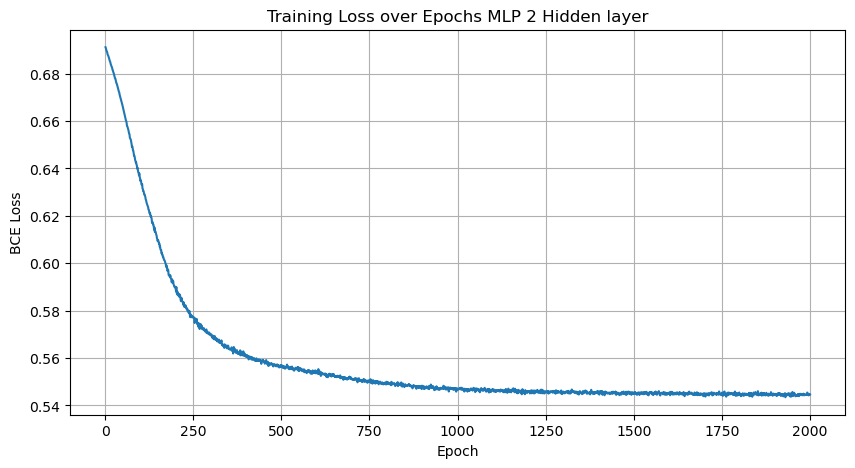

In [12]:
# Test set
y_pred = model(X_test_tensor).squeeze()

# Probabilities to class labels and threshold of 0.5 (> 0.5 = 1 (quark))
y_pred_class = (y_pred > 0.5).int() # .int() - converts True -> 1 and False -> 0 (1 and 0 (boolean output) from y_pred > 0.5)

# Convert to NumPy
y_pred_class = y_pred_class.detach().numpy()
y_test_numpy = y_test_tensor.detach().numpy()

# Statistics
print("Acuracy:", accuracy_score(y_test_numpy, y_pred_class))
print("Cinfusion Matrix:\n", confusion_matrix(y_test_numpy, y_pred_class))
print("Classification Report:\n", classification_report(y_test_numpy, y_pred_class))

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses)+1), train_losses)
plt.xlabel("Epoch")
plt.ylabel("BCE Loss")
plt.title("Training Loss over Epochs MLP 2 Hidden layer")
plt.grid(True)
plt.show()

## Summary: Classical ML vs MLP on Quark-Gluon Classification

## Dataset
- Binary classification: Gluon (0) vs Quark (1)
- 5 features: `pt`, `eta`, `phi`, `eta_width`, `phi_width`

---

## Model Performances (on Test Set)

| Model                | Accuracy | F1-Score (Class 0 - Gluon) | F1-Score (Class 1 - Quark) |
|----------------------|----------|----------------------------|-----------------------------|
| Logistic Regression  | ~68.6%   | ~0.68                      | ~0.69                       |
| Random Forest (best) | ~72.65%  | ~0.75                      | **~0.70**                   |
| MLP (1 hidden layer) | ~71.80%  | ~0.75                      | ~0.68                       |
| MLP (2 hidden layers)| ~72.25%  | ~0.74                      | **~0.70**                   |

---

## Observations

- **MLP improves with depth**: Adding a second hidden layer increased performance slightly.
- **Random Forest remains strongest**, particularly in **quark recall** (fewer false negatives).
- **Neural networks still catching up**, but closing the gap fast.
- **Sigmoid output** gives class probabilities. We used a **0.5 threshold** to map to 0/1.

---

## Implementation Notes

- Optimizer: Adam
- Loss Function: Binary Cross-Entropy
- Regularization: Dropout + Weight Decay
- Trained for 2000 epochs
- Inputs scaled with `StandardScaler`

---

## Next Steps

1. **Batch Training**
   - Switch from full-batch to mini-batch training
   - More realistic & memory efficient

2. **Loss Curve Visualization**
   - Plot BCE loss over epochs
   - Monitor convergence & spot overfitting

3. **Bayesian Neural Network (BNN)**
   - Introduce uncertainty into weights
   - Essential for Uncertainty Quantification

---





In [13]:
from torch.utils.data import TensorDataset, DataLoader

# Using MLP_2Hidden architecture
class MLP_2Hidden(nn.Module):
    def __init__(self):
        super(MLP_2Hidden, self).__init__()

        # Fully connected Input layer -> Hidden layer 1
        self.fc1 = nn.Linear(5, 16)

        # Droupout
        self.dropout = nn.Dropout(p=0.3)

        # Fully connected Hidden layer 1 -> Hidden layer 2
        self.fc2 = nn.Linear(16, 8)

        # Fully connected Hidden layer -> Output layer
        self.fc3 = nn.Linear(8, 1)

    def forward(self, x):
        # First layer - ReLU activation
        x = F.relu(self.fc1(x))
        x = self.dropout(x)

        # Hidden layer 2 - ReLU activation
        x = F.relu(self.fc2(x))

        # Output layer - sigmoid activation
        x = torch.sigmoid(self.fc3(x))

        return x


batch_size = 64

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


model = MLP_2Hidden()
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

epochs = 2000
train_losses = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0  # Accumulate loss for averaging

    for X_batch, y_batch in train_loader:
        # Forward pass
        y_pred = model(X_batch).squeeze()

        # Loss
        loss = loss_fn(y_pred, y_batch)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    # Average loss for the epoch
    avg_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_loss)

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Avg. Loss: {avg_loss:.4f}")
        
        
        


Epoch 100/2000, Avg. Loss: 0.5427
Epoch 200/2000, Avg. Loss: 0.5425
Epoch 300/2000, Avg. Loss: 0.5414
Epoch 400/2000, Avg. Loss: 0.5410
Epoch 500/2000, Avg. Loss: 0.5412
Epoch 600/2000, Avg. Loss: 0.5414
Epoch 700/2000, Avg. Loss: 0.5409
Epoch 800/2000, Avg. Loss: 0.5416
Epoch 900/2000, Avg. Loss: 0.5415
Epoch 1000/2000, Avg. Loss: 0.5409
Epoch 1100/2000, Avg. Loss: 0.5411
Epoch 1200/2000, Avg. Loss: 0.5412
Epoch 1300/2000, Avg. Loss: 0.5411
Epoch 1400/2000, Avg. Loss: 0.5414
Epoch 1500/2000, Avg. Loss: 0.5412
Epoch 1600/2000, Avg. Loss: 0.5413
Epoch 1700/2000, Avg. Loss: 0.5411
Epoch 1800/2000, Avg. Loss: 0.5411
Epoch 1900/2000, Avg. Loss: 0.5410
Epoch 2000/2000, Avg. Loss: 0.5411


Acuracy: 0.7183
Cinfusion Matrix:
 [[8104 1861]
 [3773 6262]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.68      0.81      0.74      9965
         1.0       0.77      0.62      0.69     10035

    accuracy                           0.72     20000
   macro avg       0.73      0.72      0.72     20000
weighted avg       0.73      0.72      0.72     20000



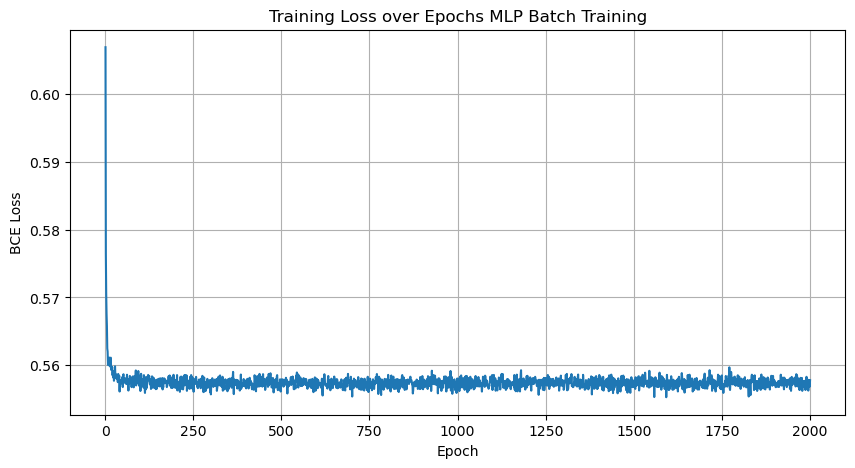

In [17]:
# Test set
y_pred = model(X_test_tensor).squeeze()

# Probabilities to class labels and threshold of 0.5 (> 0.5 = 1 (quark))
y_pred_class = (y_pred > 0.5).int() # .int() - converts True -> 1 and False -> 0 (1 and 0 (boolean output) from y_pred > 0.5)

# Convert to NumPy
y_pred_class = y_pred_class.detach().numpy()
y_test_numpy = y_test_tensor.detach().numpy()

# Statistics
print("Acuracy:", accuracy_score(y_test_numpy, y_pred_class))
print("Cinfusion Matrix:\n", confusion_matrix(y_test_numpy, y_pred_class))
print("Classification Report:\n", classification_report(y_test_numpy, y_pred_class))

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses)+1), train_losses)
plt.xlabel("Epoch")
plt.ylabel("BCE Loss")
plt.title("Training Loss over Epochs MLP Batch Training")
plt.grid(True)
plt.show()

##  MLP Results Summary: Binary Classification (Quark vs Gluon)

| Model           | Architecture     | Training Type | Accuracy | Notes                      |
|----------------|------------------|----------------|----------|----------------------------|
| Logistic Reg.  | –                | –              | ~66%     | Baseline                   |
| Random Forest  | –                | GridSearch     | **~72.65%** | Best traditional ML        |
| MLP            | 1 Hidden Layer   | Full-batch     | ~71.8%   | Stable improvement         |
| MLP            | 2 Hidden Layers  | Full-batch     | ~72.2%   | Slightly better            |
| MLP            | 2 Hidden Layers  | **Mini-batch** | **~72.34%** | Best DL model so far       |

---

### Observations
- **Random Forest** remains the best overall, likely due to:
  - Strong performance on tabular data
  - Inherent ensembling (bootstrapped trees)
- **MLPs showed competitive performance**, and improved with:
  - Deeper architecture (2 layers)
  - Regularization (dropout, weight decay)
  - Mini-batch training

### Why did we not beat Random Forest Classifier?
- **Data Size**: 80K may still be too small for NN to truly shine
- **Feature Simplicity**: Engineered features (like $η$-width, $p_T$) may favor decision trees
- **No deep signal complexity**: If the features are linearly or hierarchically separable, RF excels


---



# Bayesian Neural Networks

In [15]:
# BNN_MLP using MC Dropout

torch.manual_seed(42)


class BnnMCDropout(nn.Module):
    def __init__(self):
        super(BnnMCDropout, self).__init__()
        self.fc1 = nn.Linear(5, 16)
        self.dropout = nn.Dropout(p=0.3)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)  # Dropout again at second hidden layer
        x = torch.sigmoid(self.fc3(x))
        return x

# Instantiate model, loss, optimizer
model = BnnMCDropout()
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# Training loop
epochs = 2000
train_losses = []
batch_size = 512

for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0

    for batch_X, batch_y in train_loader:
        # Forward pass
        y_pred = model(batch_X).squeeze()
        loss = loss_fn(y_pred, batch_y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_loss)

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Avg. Loss: {avg_loss:.4f}")

Epoch 100/2000, Avg. Loss: 0.5562
Epoch 200/2000, Avg. Loss: 0.5577
Epoch 300/2000, Avg. Loss: 0.5557
Epoch 400/2000, Avg. Loss: 0.5566
Epoch 500/2000, Avg. Loss: 0.5579
Epoch 600/2000, Avg. Loss: 0.5574
Epoch 700/2000, Avg. Loss: 0.5567
Epoch 800/2000, Avg. Loss: 0.5578
Epoch 900/2000, Avg. Loss: 0.5584
Epoch 1000/2000, Avg. Loss: 0.5574
Epoch 1100/2000, Avg. Loss: 0.5577
Epoch 1200/2000, Avg. Loss: 0.5575
Epoch 1300/2000, Avg. Loss: 0.5575
Epoch 1400/2000, Avg. Loss: 0.5570
Epoch 1500/2000, Avg. Loss: 0.5570
Epoch 1600/2000, Avg. Loss: 0.5578
Epoch 1700/2000, Avg. Loss: 0.5583
Epoch 1800/2000, Avg. Loss: 0.5572
Epoch 1900/2000, Avg. Loss: 0.5574
Epoch 2000/2000, Avg. Loss: 0.5578


Acuracy: 0.7191
Cinfusion Matrix:
 [[8110 1855]
 [3763 6272]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.68      0.81      0.74      9965
         1.0       0.77      0.63      0.69     10035

    accuracy                           0.72     20000
   macro avg       0.73      0.72      0.72     20000
weighted avg       0.73      0.72      0.72     20000



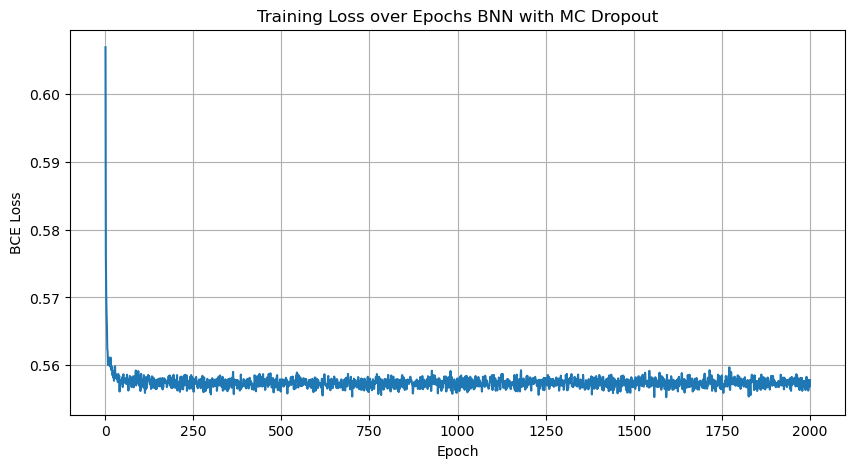

In [19]:
# Test set
y_pred = model(X_test_tensor).squeeze()

# Probabilities to class labels and threshold of 0.5 (> 0.5 = 1 (quark))
y_pred_class = (y_pred > 0.5).int() # .int() - converts True -> 1 and False -> 0 (1 and 0 (boolean output) from y_pred > 0.5)

# Convert to NumPy
y_pred_class = y_pred_class.detach().numpy()
y_test_numpy = y_test_tensor.detach().numpy()

# Statistics
print("Acuracy:", accuracy_score(y_test_numpy, y_pred_class))
print("Cinfusion Matrix:\n", confusion_matrix(y_test_numpy, y_pred_class))
print("Classification Report:\n", classification_report(y_test_numpy, y_pred_class))

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses)+1), train_losses)
plt.xlabel("Epoch")
plt.ylabel("BCE Loss")
plt.title("Training Loss over Epochs BNN with MC Dropout")
plt.grid(True)
plt.show()

Accuracy: 0.7251
Confusion Matrix:
 [[8122 1843]
 [3655 6380]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.69      0.82      0.75      9965
         1.0       0.78      0.64      0.70     10035

    accuracy                           0.73     20000
   macro avg       0.73      0.73      0.72     20000
weighted avg       0.73      0.73      0.72     20000

Average Uncertainty: 0.073788
Average Confidence: 0.926212
% of predictions with >90% confidence: 91.47999999999999


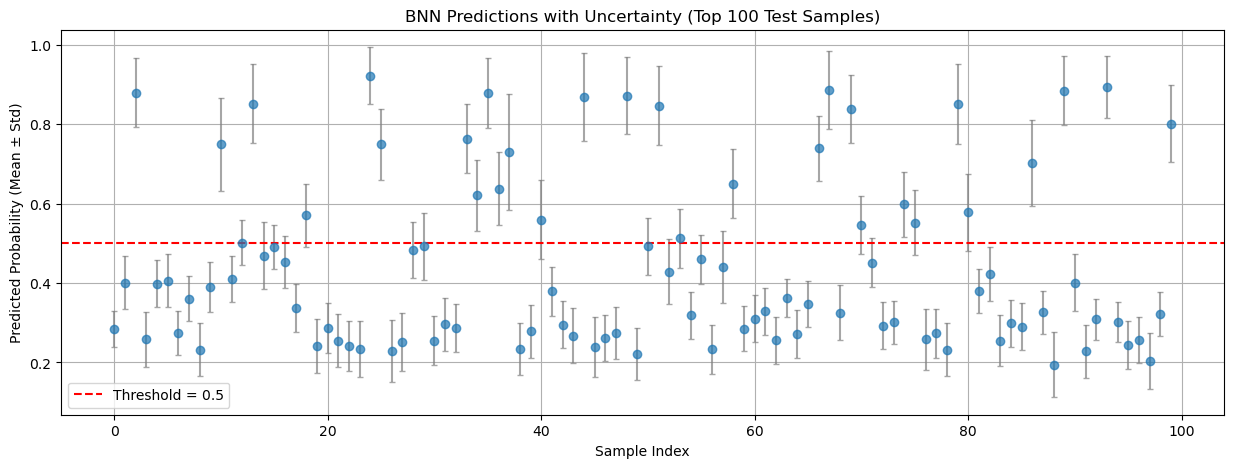

In [31]:
# Monte Carlo Inference for BNN with MC Dropout

# Function to perform MC Dropout Inference
def mc_dropout_predict(model, X_tensor, n_samples=100):
    model.train()  # Important: dropout must be ON during inference for MC sampling
    preds = []

    with torch.no_grad():
        for _ in range(n_samples):
            pred = model(X_tensor).squeeze()
            preds.append(pred.cpu().numpy())

    preds = np.array(preds)  # shape: [n_samples, N]
    mean_preds = preds.mean(axis=0)
    std_preds = preds.std(axis=0)
    return mean_preds, std_preds

# Perform MC Inference
mean_probs, std_probs = mc_dropout_predict(model, X_test_tensor, n_samples=100)

# Convert ground truth
true_labels = y_test_tensor.detach().cpu().numpy()

# Classification based on mean probabilities
predicted_classes = (mean_probs > 0.5).astype(int)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(true_labels, predicted_classes))
print("Confusion Matrix:\n", confusion_matrix(true_labels, predicted_classes))
print("Classification Report:\n", classification_report(true_labels, predicted_classes))
# print("Mean Probability:", mean_probs[:10])
# print("Uncertainty:", std_probs[:10])
# print("Confidence score:", 1 - std_probs[:10])


overall_uncertainty = std_probs.mean()
print("Average Uncertainty:", overall_uncertainty)

average_confidence = (1 - std_probs).mean()
print("Average Confidence:", average_confidence)

threshold = 0.9
percent_high_conf = np.mean((1 - std_probs) > threshold) * 100
print(f"% of predictions with >{threshold*100:.0f}% confidence:", percent_high_conf)


# Visualization: Mean ± Std Dev for first 100 samples
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.errorbar(range(100), mean_probs[:100], yerr=std_probs[:100], fmt='o', ecolor='gray', alpha=0.7, capsize=2)
plt.axhline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.title("BNN Predictions with Uncertainty (Top 100 Test Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Predicted Probability (Mean ± Std)")
plt.legend()
plt.grid(True)
plt.show()


### Bayesian Neural Network (BNN) Summary

| Model           | Architecture       | Training Type | Accuracy | Avg. Confidence | % >90% Conf | Notes                                 |
|----------------|--------------------|----------------|----------|------------------|---------------|---------------------------------------|
| Logistic Reg.  | –                  | –              | ~66%     | –                | –             | Baseline                              |
| Random Forest  | –                  | GridSearch     | **~72.65%** | –                | –             | Best traditional ML                   |
| MLP            | 1 Hidden Layer     | Full-batch     | ~71.8%   | –                | –             | Stable improvement                    |
| MLP            | 2 Hidden Layers    | Full-batch     | ~72.2%   | –                | –             | Slightly better                       |
| MLP            | 2 Hidden Layers    | **Mini-batch** | **~72.34%** | –                | –             | Best DL model so far                  |
| **BNN (MC Dropout)** | 2 Hidden Layers w/ Dropout x2 | Mini-batch     | **~72.54%** | **92.6%**         | **91.07%**      | First Uncertainty-Aware Model (MC Dropout)

---

**Summary**: 
BNN using Monte Carlo Dropout achieved an accuracy of **72.54%**, with an **average confidence score of 92.6%** and **91.07% of predictions above 90% confidence**. This not only matches the performance of traditional MLPs, but adds a layer of uncertainty quantification, making the model interpretable and reliable under ambiguity.

**Inference Quality**:
- Predictions are accompanied by **mean ± std deviation** (visualized for top 100 samples).
- The model is both **accurate** and **self-aware** — knowing when it’s confident vs. uncertain.

**Next Possible Steps**:
- Try deeper networks or vary dropout for performance boosts
- Apply BNN to other datasets with ambiguous labels
- Use uncertainty as a filtering mechanism in decision making (e.g., reject low-confidence samples)